## Time Series Analysis: Superstore Dataset 

Time Series vs Supervised Machine Learning:
- Time Series work when we only have one column of the data available
- For multiple columns we can Supervised ML algos like Random Forest, XGBoost, etc as more predictor columns will bring more info and hence predictor will be better.
- For time series, ideal data is like one column of historical data on sales, demand, or any value to be predicted, we can generate predictions.

Installing the xlrd library to read data to read xls file using pandas

In [1]:
!pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


#### Reading the Data

In [5]:
import pandas as pd
import numpy as np

# Supressing scientific notations
np.set_printoptions(suppress=True)

StoreSalesData=pd.read_excel('../Datasets/StoreSalesData.xls')
StoreSalesData

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,Philippines,Southeast Asia,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,10996,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,New Zealand,Oceania,OFF-ST-10004748,Office Supplies,Storage,"Smead Lockers, Blue",396.840,2,0.00,59.520
10996,10997,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,New Zealand,Oceania,TEC-CO-10002678,Technology,Copiers,"Brother Wireless Fax, High-Speed",1508.040,4,0.00,437.280
10997,10998,IN-2013-82673,2013-09-10,2013-09-14,Standard Class,EM-13810,Eleni McCrary,Corporate,Wellington,Wellington,New Zealand,Oceania,OFF-LA-10000959,Office Supplies,Labels,"Harbour Creations Round Labels, Alphabetical",6.570,1,0.00,0.630
10998,10999,ID-2012-83604,2012-08-28,2012-08-28,Same Day,PO-19195,Phillina Ober,Home Office,Gold Coast,Queensland,Australia,Oceania,FUR-BO-10002866,Furniture,Bookcases,"Safco Classic Bookcase, Pine",1582.200,6,0.40,-870.300


### Looking at the data summary

In [6]:
StoreSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         11000 non-null  int64         
 1   Order ID       11000 non-null  object        
 2   Order Date     11000 non-null  datetime64[ns]
 3   Ship Date      11000 non-null  datetime64[ns]
 4   Ship Mode      11000 non-null  object        
 5   Customer ID    11000 non-null  object        
 6   Customer Name  11000 non-null  object        
 7   Segment        11000 non-null  object        
 8   City           11000 non-null  object        
 9   State          11000 non-null  object        
 10  Country        11000 non-null  object        
 11  Region         11000 non-null  object        
 12  Product ID     11000 non-null  object        
 13  Category       11000 non-null  object        
 14  Sub-Category   11000 non-null  object        
 15  Product Name   1100

## **Problem Statement:**

- Superstore management wants to create a predictive model after analyzing their sales data, that can tell the sales quantity expected in the next month for each of the categories of products, ie. Furniture, Office Supplies and Technology

### Observing the Quantitative, Qualitative and Categorical variables in datam

In [8]:
StoreSalesData.nunique()

Row ID           11000
Order ID          5436
Order Date        1265
Ship Date         1378
Ship Mode            4
Customer ID        795
Customer Name      795
Segment              3
City               655
State              179
Country             23
Region               4
Product ID        2721
Category             3
Sub-Category        17
Product Name      1913
Sales             8815
Quantity            14
Discount            19
Profit            8120
dtype: int64

In this data, we can have two variables as time series forcasting: **Sales** and **Quantity**.

- **Sales** is the price value and can be derived using Quantity mutliplied by the cost associated with products.
- **Quantity** is the raw or base variables and should be selected for time series modelling.


Time series algorithm expects ONE column of data that to forecast furthur, but since this problem statement says to generate monthly predictions, we will aggregate the Quantity number monthly.

### Feature Engineering in data

In [9]:
StoreSalesData.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

- Separating month and year from 'Order Date' can be useful in future use.
- We can use that and generate Year and Month columns, which can be used for our aggrgation

In [11]:
# Function to get month from a date
def Function_get_month(inpDate):
    return (inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return (inpDate.year)

# Creating new columns
StoreSalesData['Month']=StoreSalesData['Order Date'].apply(Function_get_month)
StoreSalesData['Year']=StoreSalesData['Order Date'].apply(Function_get_year)

StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420,8,2013
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014


In [13]:
print(StoreSalesData['Year'].nunique())
print(StoreSalesData['Month'].nunique())

4
12


- We need 2 year of data for time series modelling such that we can predict monthly sales.
- As one year will be one complete cycle, because all months from Jan to Dec will be used for analysis for pattern and next cycle will be repeating.
- Thus ideally, 2 years worth of data will be needed and data provides with 4 years, so can easily continue with analysis.

In [19]:
# Checking unique values in Year and Month columns
print("Unique values in Year Column: ", StoreSalesData['Year'].sort_values().unique())
print("Unique Values in Month Column: ", StoreSalesData['Month'].sort_values().unique())

Unique values in Year Column:  [2011 2012 2013 2014]
Unique Values in Month Column:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


#### Aggregating Sales Quantity for each month

Preparing data for time series modelling.

In [20]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=StoreSalesData['Month'],
            index=StoreSalesData['Year'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,328,361,442,406,517,631,388,737,722,837,856,1028
2012,531,425,427,427,901,924,380,978,728,1092,1068,847
2013,665,448,527,448,1228,1273,716,1307,1220,1021,1010,1120
2014,951,704,890,727,1284,1416,738,1478,1302,1588,1632,1548


The above data is in a matrix format, and time series expects data in one single column, thus by using **melt()** function can help arrange the data year-month wise in a single column.

In [22]:
# Converting the crosstabe data into one single column for Time Series
pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData['Month'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum').melt()

,Year,value
0,2011,328
1,2011,361
2,2011,442
3,2011,406
4,2011,517
5,2011,631
6,2011,388
7,2011,737
8,2011,722
9,2011,837


#### Visualizing the Total sales Quantity per month

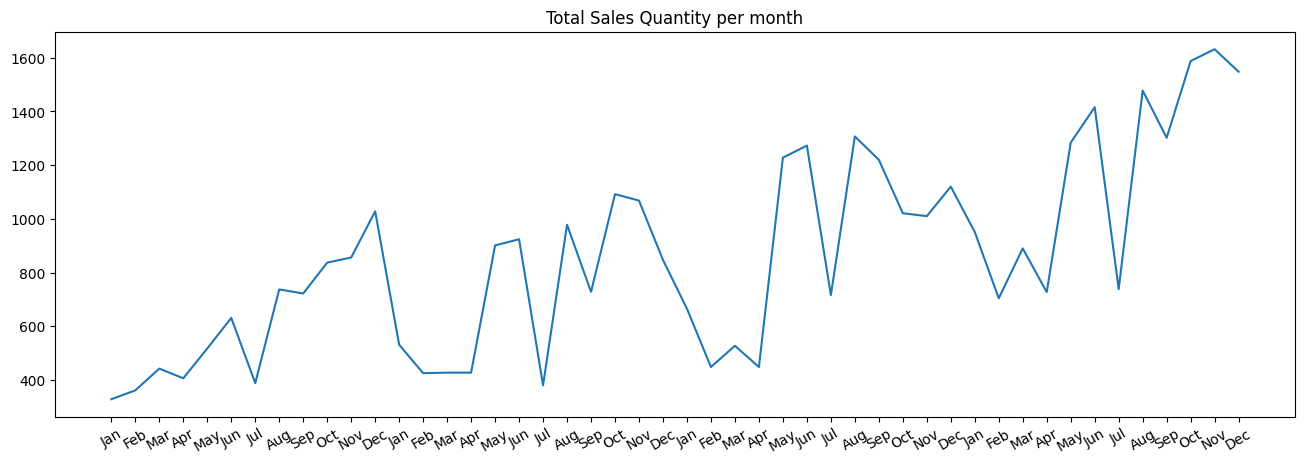

In [23]:
import matplotlib.pyplot as plt

SalesQuantity=pd.crosstab(columns=StoreSalesData['Year'],
                          index=StoreSalesData['Month'],
                          values=StoreSalesData['Quantity'],
                          aggfunc='sum').melt()['value']

# Taking data for 4 years
MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline

SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')

# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1), MonthNames, rotation=30)